In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.datasets import fetch_openml 
from sklearn.utils import shuffle 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, RidgeCV
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import median_absolute_error, r2_score

In [2]:
data =pd.read_csv("D:\\FALL 2022\\Machine Learning\\Assignment_2\\Data for task 2\\House_Rent_Dataset.csv")

data.shape

(4746, 12)

# The goal is to predict the ‘Rent column. For this assignment you can ignore the date.

In [3]:
data = data.drop(['Posted On', 'Floor'], axis = 'columns')

In [4]:
data.shape

(4746, 10)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   Area Locality      4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
dtypes: int64(4), object(6)
memory usage: 370.9+ KB


# 2.1 

In [8]:
categorical = data.dtypes == 'object'

In [9]:
categorical

BHK                  False
Rent                 False
Size                 False
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool

# continuous vs categorical

In [10]:
continous_variables = data.select_dtypes("number")

print("continous_variables", continous_variables)

continous_variables       BHK   Rent  Size  Bathroom
0       2  10000  1100         2
1       2  20000   800         1
2       2  17000  1000         1
3       2  10000   800         1
4       2   7500   850         1
...   ...    ...   ...       ...
4741    2  15000  1000         2
4742    3  29000  2000         3
4743    3  35000  1750         3
4744    3  45000  1500         2
4745    2  15000  1000         2

[4746 rows x 4 columns]


In [11]:
cat_variables = data.select_dtypes("object")

print("cat_variables", cat_variables)

cat_variables         Area Type             Area Locality       City Furnishing Status  \
0      Super Area                    Bandel    Kolkata       Unfurnished   
1      Super Area  Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished   
2      Super Area   Salt Lake City Sector 2    Kolkata    Semi-Furnished   
3      Super Area               Dumdum Park    Kolkata       Unfurnished   
4     Carpet Area             South Dum Dum    Kolkata       Unfurnished   
...           ...                       ...        ...               ...   
4741  Carpet Area              Bandam Kommu  Hyderabad    Semi-Furnished   
4742   Super Area      Manikonda, Hyderabad  Hyderabad    Semi-Furnished   
4743  Carpet Area      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished   
4744  Carpet Area                Gachibowli  Hyderabad    Semi-Furnished   
4745  Carpet Area           Suchitra Circle  Hyderabad       Unfurnished   

      Tenant Preferred Point of Contact  
0     Bachelors/Family    Conta

# Univaritate distribution of each continous data

C:\Users\tamim\AppData\Local\Temp\ipykernel_7072\3498484797.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  continous_variables.hist(ax = ax)


array([[<AxesSubplot: title={'center': 'BHK'}>,
        <AxesSubplot: title={'center': 'Rent'}>],
       [<AxesSubplot: title={'center': 'Size'}>,
        <AxesSubplot: title={'center': 'Bathroom'}>]], dtype=object)

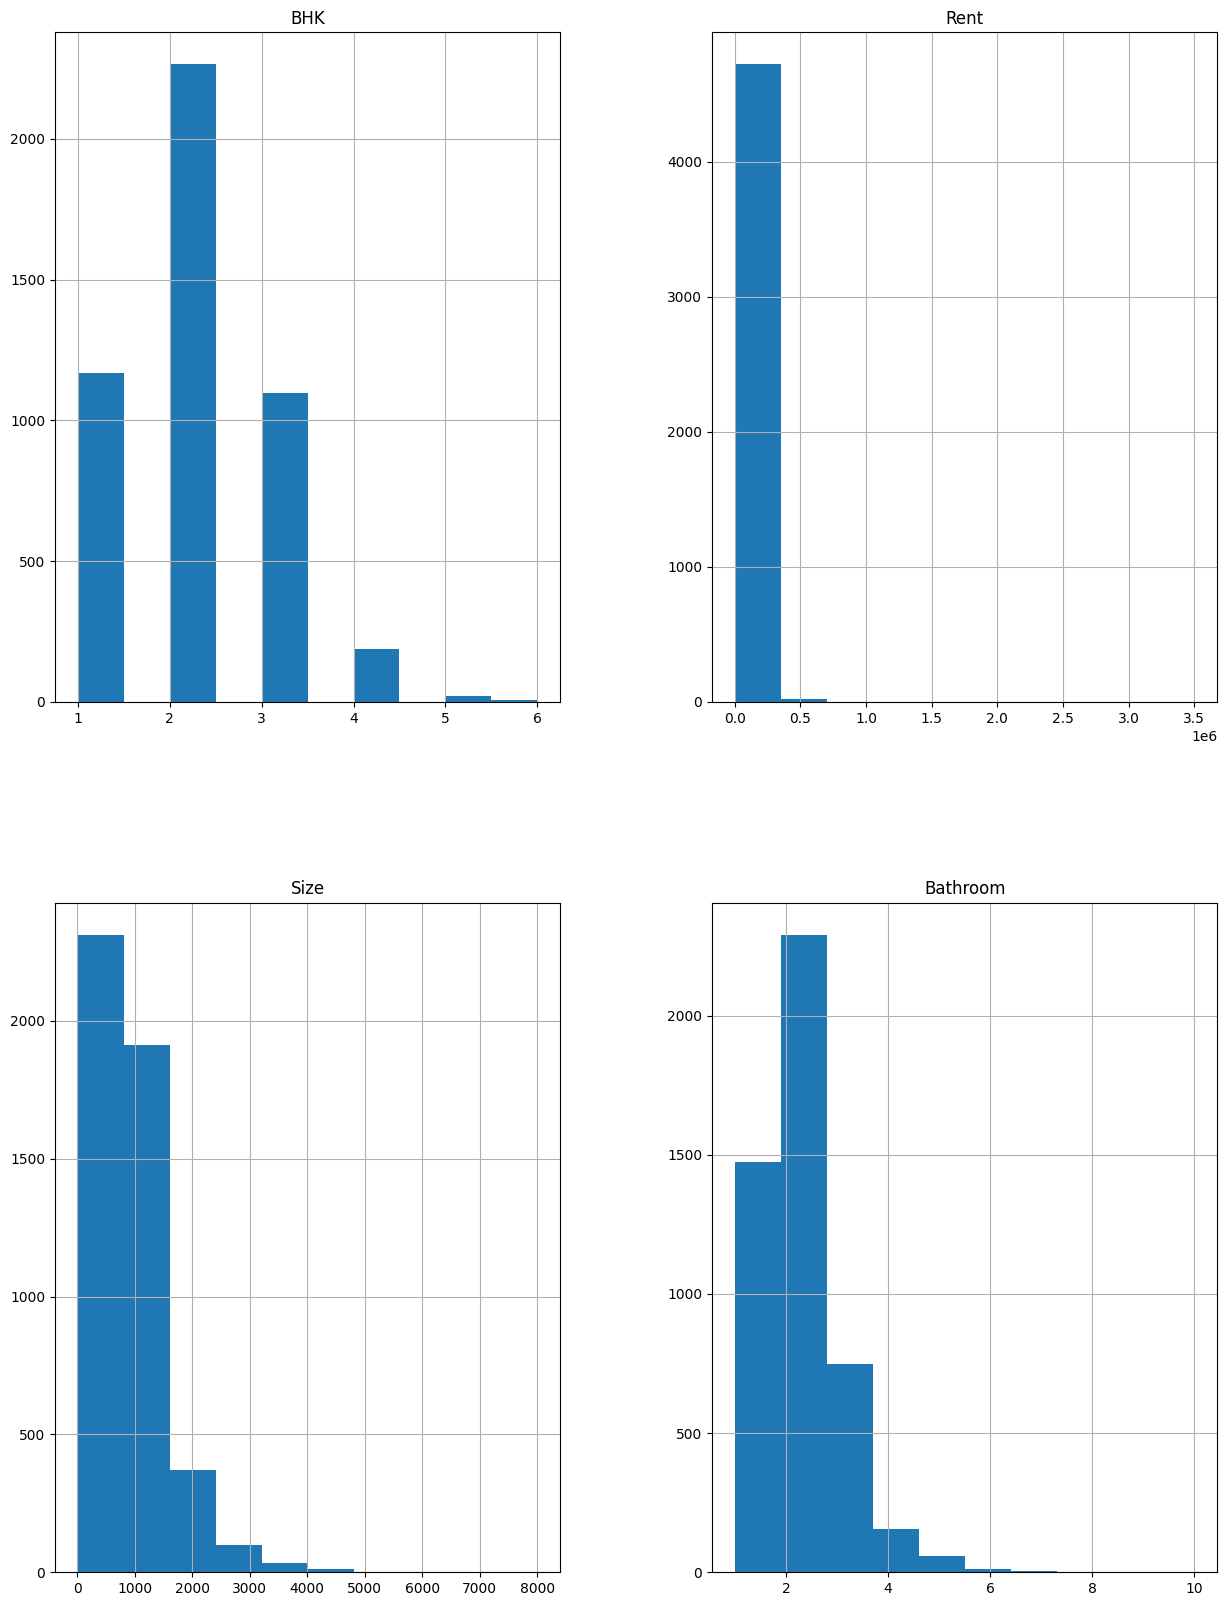

In [12]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
continous_variables.hist(ax = ax)

# VISUALIZAING THE DISTRIBUTION OF TARGET

<AxesSubplot: xlabel='Rent', ylabel='Bathroom'>

<Figure size 1000x500 with 0 Axes>

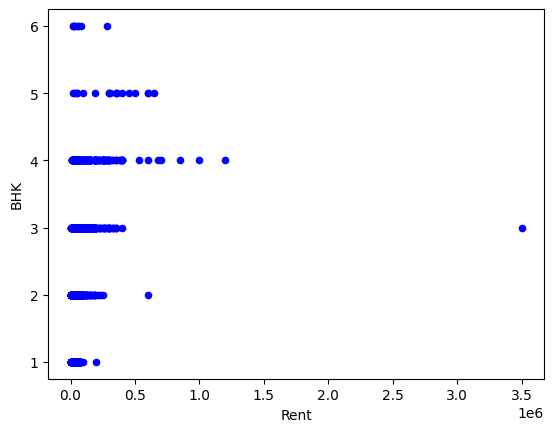

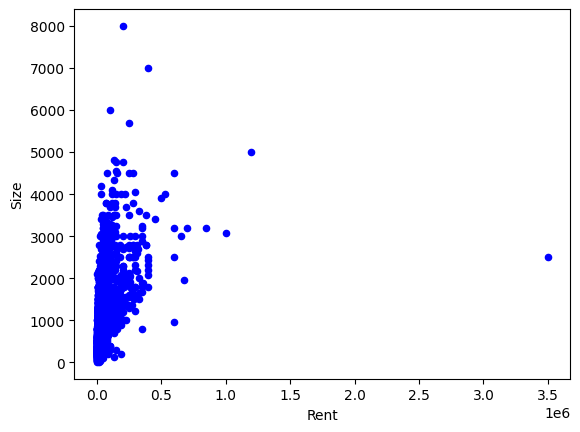

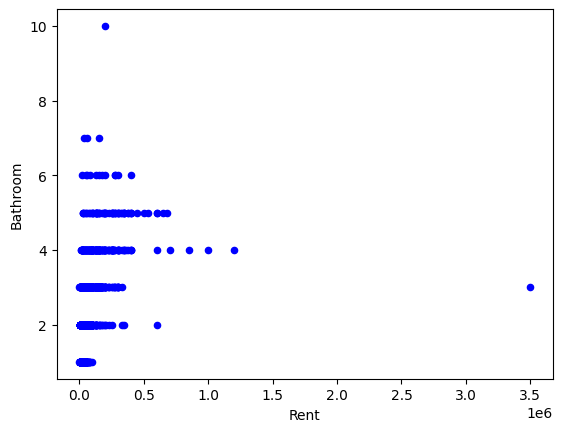

In [13]:
fig = plt.figure(figsize = (10,5))
continous_variables.plot(kind='scatter', x='Rent', y='BHK', color='blue')    
continous_variables.plot(kind='scatter', x='Rent', y='Size', color='blue')    
continous_variables.plot(kind='scatter', x='Rent', y='Bathroom', color='blue')        

In [14]:
categorical_variables = data.select_dtypes("object")

categorical_variables 

,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...
4741,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent


In [15]:
scaler = StandardScaler()
encoder = OneHotEncoder()

# train valid test split

In [16]:
X = data.drop(['Rent'], axis=1)
y = data['Rent']

In [17]:
y.shape

(4746,)

In [18]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval)
X_train.columns

Index(['BHK', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

In [19]:
X_train.shape

(2669, 9)

In [20]:
categorical = X.dtypes == 'object'

In [21]:
categorical

BHK                  False
Size                 False
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool

In [22]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

In [23]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Use ColumnTransformer and pipeline to encode categorical variables

In [24]:
## ENCODING CATEGORICAL AND CONTINOUS DATA
from sklearn.compose import ColumnTransformer

numeric_features = ['Size']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = [ 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# enet_model

In [25]:
enet_model = ElasticNet()

# Evaluate ElasticNet using cross-validation with the default parameters.

In [26]:
pipe = make_pipeline(preprocessor, ElasticNet())
np.mean(cross_val_score(pipe, X_train, y_train))

0.3722676910682966

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Size']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Area Type', 'Area Locality',
                                                   'City', 'Furnishing Status',
                                                   'Tenant Preferred',
                                                   'Bathroom',
                                                   'Point of Contact'])])),
                ('elasticnet', ElasticNet())])

# TransformedTargetRegressor to logarithm transform the target

In [48]:
log_regressor = TransformedTargetRegressor(
    ElasticNet(), func=np.log, inverse_func=np.exp)

preprocess = make_column_transformer((StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical)) 
pipe = make_pipeline(preprocess, log_regressor)
np.mean(cross_val_score(pipe, X_trainval, y_trainval))


-0.020557139405275794

In [49]:
param_grid = {              
'transformedtargetregressor__regressor__alpha': np.logspace(-4, -1, 3),
'transformedtargetregressor__regressor__l1_ratio': [0.01, .1, 1]}

grid = GridSearchCV(pipe, param_grid) 
grid.fit(X_trainval, y_trainval)
# test score
grid.score(X_test, y_test)

C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.64267184594661, tolerance: 0.24387904528005652
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.57267761586516, tolerance: 0.24822732296171618
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.50540342536934, tolerance: 0.24669949443937222
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-

0.6345586282995592

In [50]:
grid.best_params_

{'transformedtargetregressor__regressor__alpha': 0.0031622776601683794,
 'transformedtargetregressor__regressor__l1_ratio': 1}

In [51]:
# validation score
grid.best_score_

0.5477779600794721

In [52]:
results = pd.DataFrame(grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_transformedtargetregressor__regressor__alpha',
       'param_transformedtargetregressor__regressor__l1_ratio', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [53]:
plot_data = results.pivot('param_transformedtargetregressor__regressor__alpha', 'param_transformedtargetregressor__regressor__l1_ratio','mean_test_score')
plot_data

C:\Users\tamim\AppData\Local\Temp\ipykernel_7072\778914828.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = results.pivot('param_transformedtargetregressor__regressor__alpha', 'param_transformedtargetregressor__regressor__l1_ratio','mean_test_score')
C:\Users\tamim\AppData\Local\Temp\ipykernel_7072\778914828.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  plot_data = results.pivot('param_transformedtargetregressor__regressor__alpha', 'param_transformedtargetregressor__regressor__l1_ratio','mean_test_score')


param_transformedtargetregressor__regressor__l1_ratio,0.01,0.10,1.00
param_transformedtargetregressor__regressor__alpha,,,
0.000100,0.545020,0.544054,0.531187
0.003162,0.533857,0.531663,0.547778
0.100000,0.519630,0.505891,0.369389


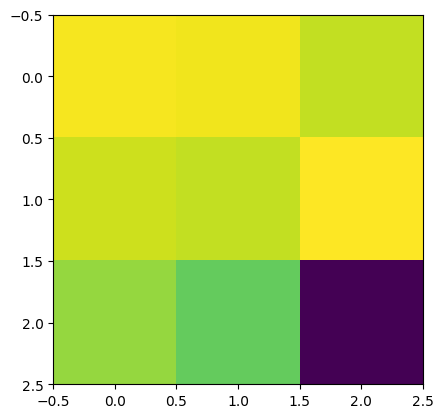

In [54]:
plt.imshow(plot_data)

<AxesSubplot: xlabel='param_transformedtargetregressor__regressor__l1_ratio', ylabel='param_transformedtargetregressor__regressor__alpha'>

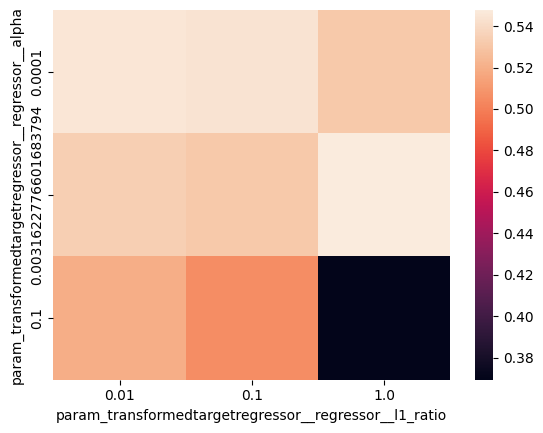

In [56]:
from seaborn import heatmap
heatmap(plot_data)

In [57]:
grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  BHK                   True
Size                  True
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom              True
Point of Contact     False
dtype: bool),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  BHK                  False
Size                 False
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool)])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=ElasticNet(alpha=0.0031622776601683794,
                                                                 l1_ratio=1)))])

In [58]:
pipe.fit(X_trainval, y_trainval)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  BHK                   True
Size                  True
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom              True
Point of Contact     False
dtype: bool),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  BHK                  False
Size                 False
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool)])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=ElasticNet()))])

In [59]:
default_coef = pipe.named_steps.transformedtargetregressor.regressor_.coef_

In [60]:
best_coef = grid.best_estimator_.named_steps.transformedtargetregressor.regressor_.coef_

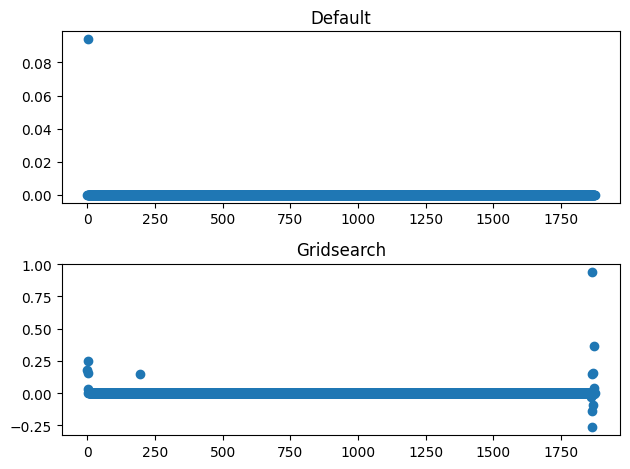

In [61]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title("Default")
ax[0].plot(default_coef, 'o')
ax[1].set_title("Gridsearch")
ax[1].plot(best_coef, 'o')

fig.tight_layout()

In [62]:
# top20 from default
top20 = np.argsort(abs(default_coef))[-20:]
print(top20)

[ 633  632  631  615  630  628  627  626  625  624  623  622  621  620
  619  618  617  629 1875    2]


In [63]:
# top20 from gridsearch
top20 = np.argsort(abs(best_coef))[-20:]
print(top20)

[ 622  623  624  625  621 1873    4 1863 1871 1870 1865  196 1864    2
 1868    0    1 1866 1874 1867]


# Descesion Tree

# Use the same train test split.

In [64]:
X = data.drop(['Rent'], axis=1)
y = data['Rent']

In [65]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval)
X_train.columns

Index(['BHK', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

# proper preprocessing

In [86]:
dt = DecisionTreeRegressor()

In [87]:
preprocess = make_column_transformer((StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical)) 
pipe = make_pipeline(preprocess, dt)
np.mean(cross_val_score(pipe, X_trainval, y_trainval))

0.5380806778394884

In [88]:
param_grid = {'decisiontreeregressor__max_depth': range(1,6)}
grid1 = GridSearchCV(pipe, param_grid) 
grid1.fit(X_trainval, y_trainval)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         BHK                   True
Size                  True
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom              True
Point of Contact     False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         BHK                  False
Size                 False
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': range(1, 6)})

In [89]:
grid1.best_params_

{'decisiontreeregressor__max_depth': 5}

In [90]:
grid1.best_score_

0.5459486752355877

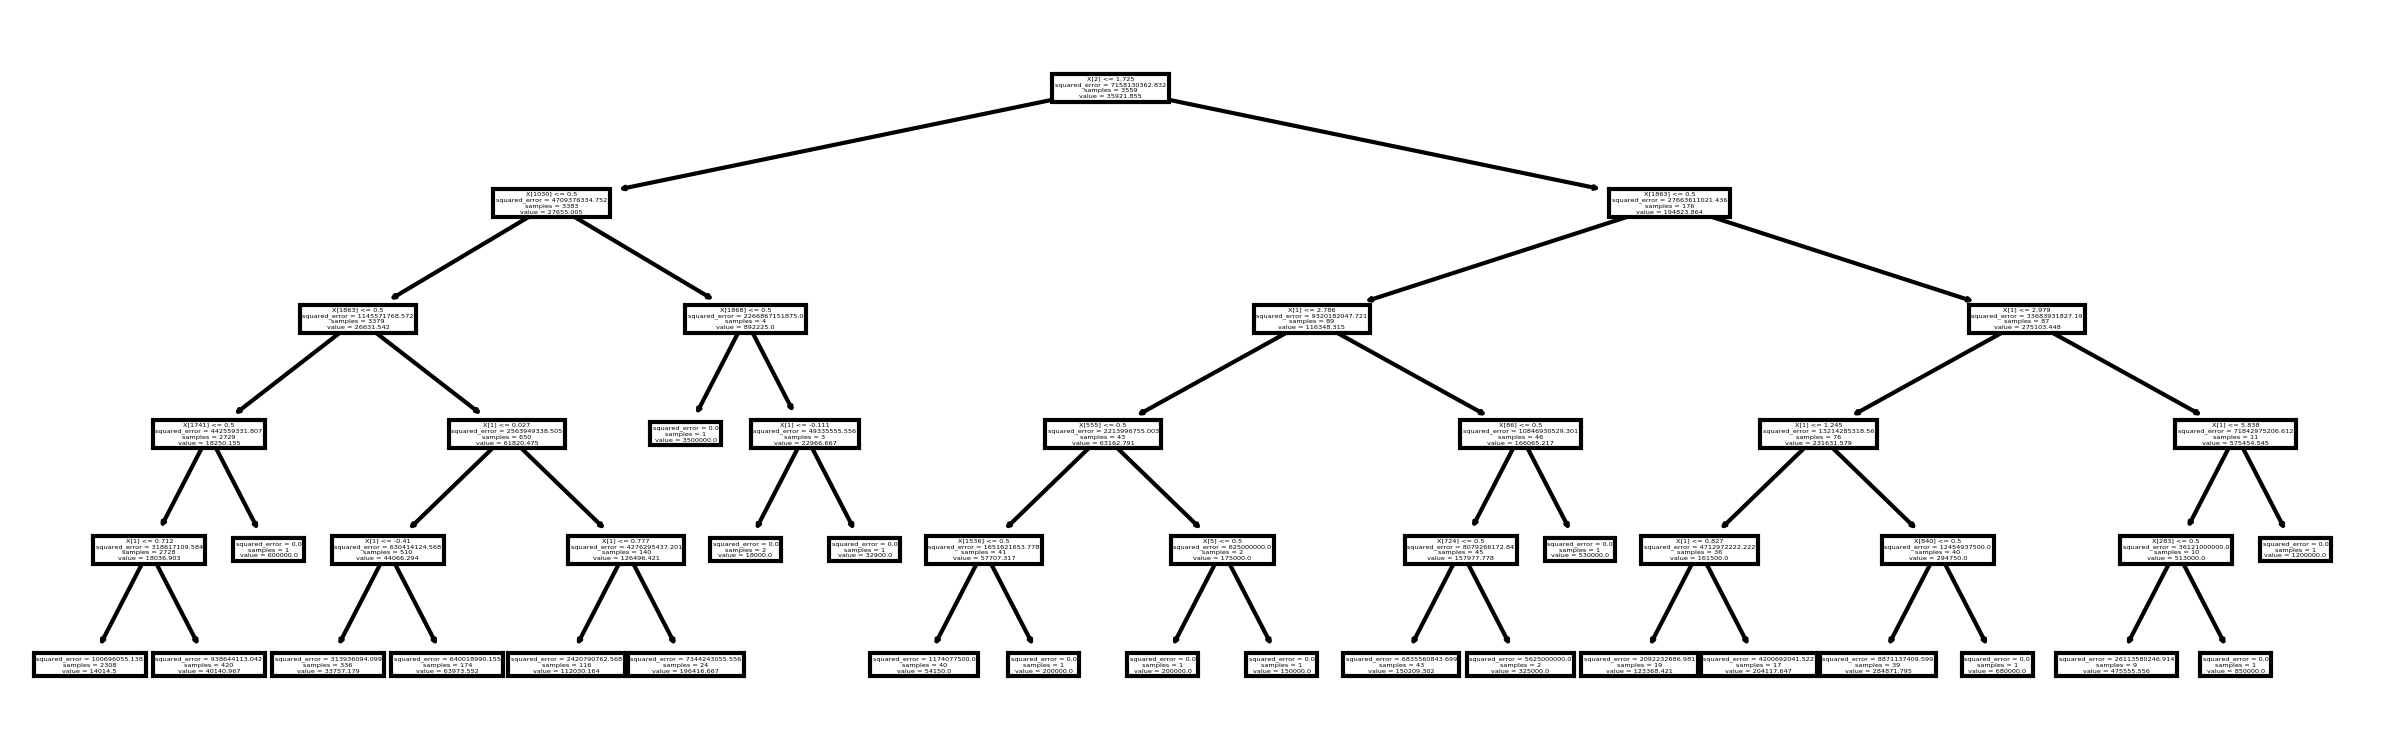

In [92]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
tree = grid1.best_estimator_.named_steps.decisiontreeregressor
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree)

In [93]:
param_grid = {'decisiontreeregressor__max_leaf_nodes': range(2,20,2)}
grid2 = GridSearchCV(pipe, param_grid) 
grid2.fit(X_trainval, y_trainval)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         BHK                   True
Size                  True
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom              True
Point of Contact     False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         BHK                  False
Size                 False
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_leaf_nodes': range(2, 20, 2)})

In [94]:
grid2.best_params_

{'decisiontreeregressor__max_leaf_nodes': 16}

In [95]:
grid2.best_score_

0.48433569210333616

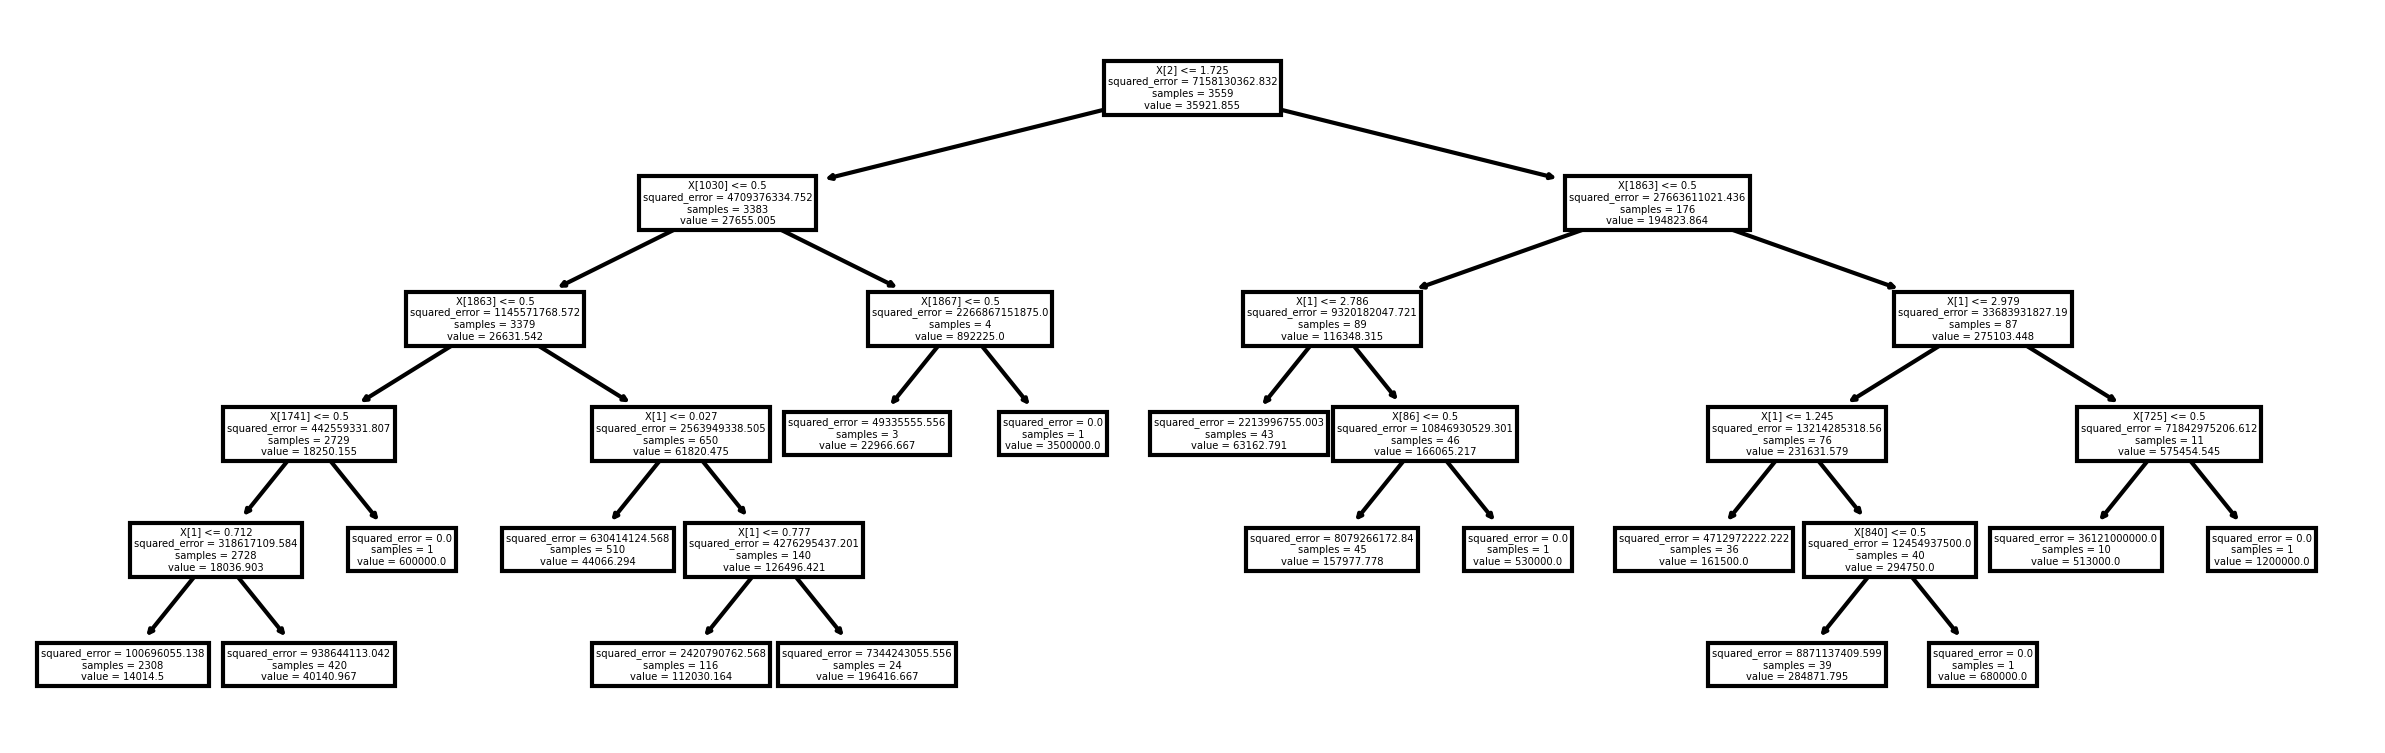

In [96]:
tree = grid2.best_estimator_.named_steps.decisiontreeregressor
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree)

# How is the preprocessing for DecisionTreeRegressor different from ElasticNet?

In [97]:
param_grid = {'decisiontreeregressor__min_samples_split': range(50,100,10)}
grid3 = GridSearchCV(pipe, param_grid) 
grid3.fit(X_trainval, y_trainval)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         BHK                   True
Size                  True
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom              True
Point of Contact     False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         BHK                  False
Size                 False
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__min_samples_split': range(50, 100, 10)})

In [98]:
grid3.best_params_

{'decisiontreeregressor__min_samples_split': 50}

In [99]:
grid3.best_score_

0.04850630378853147

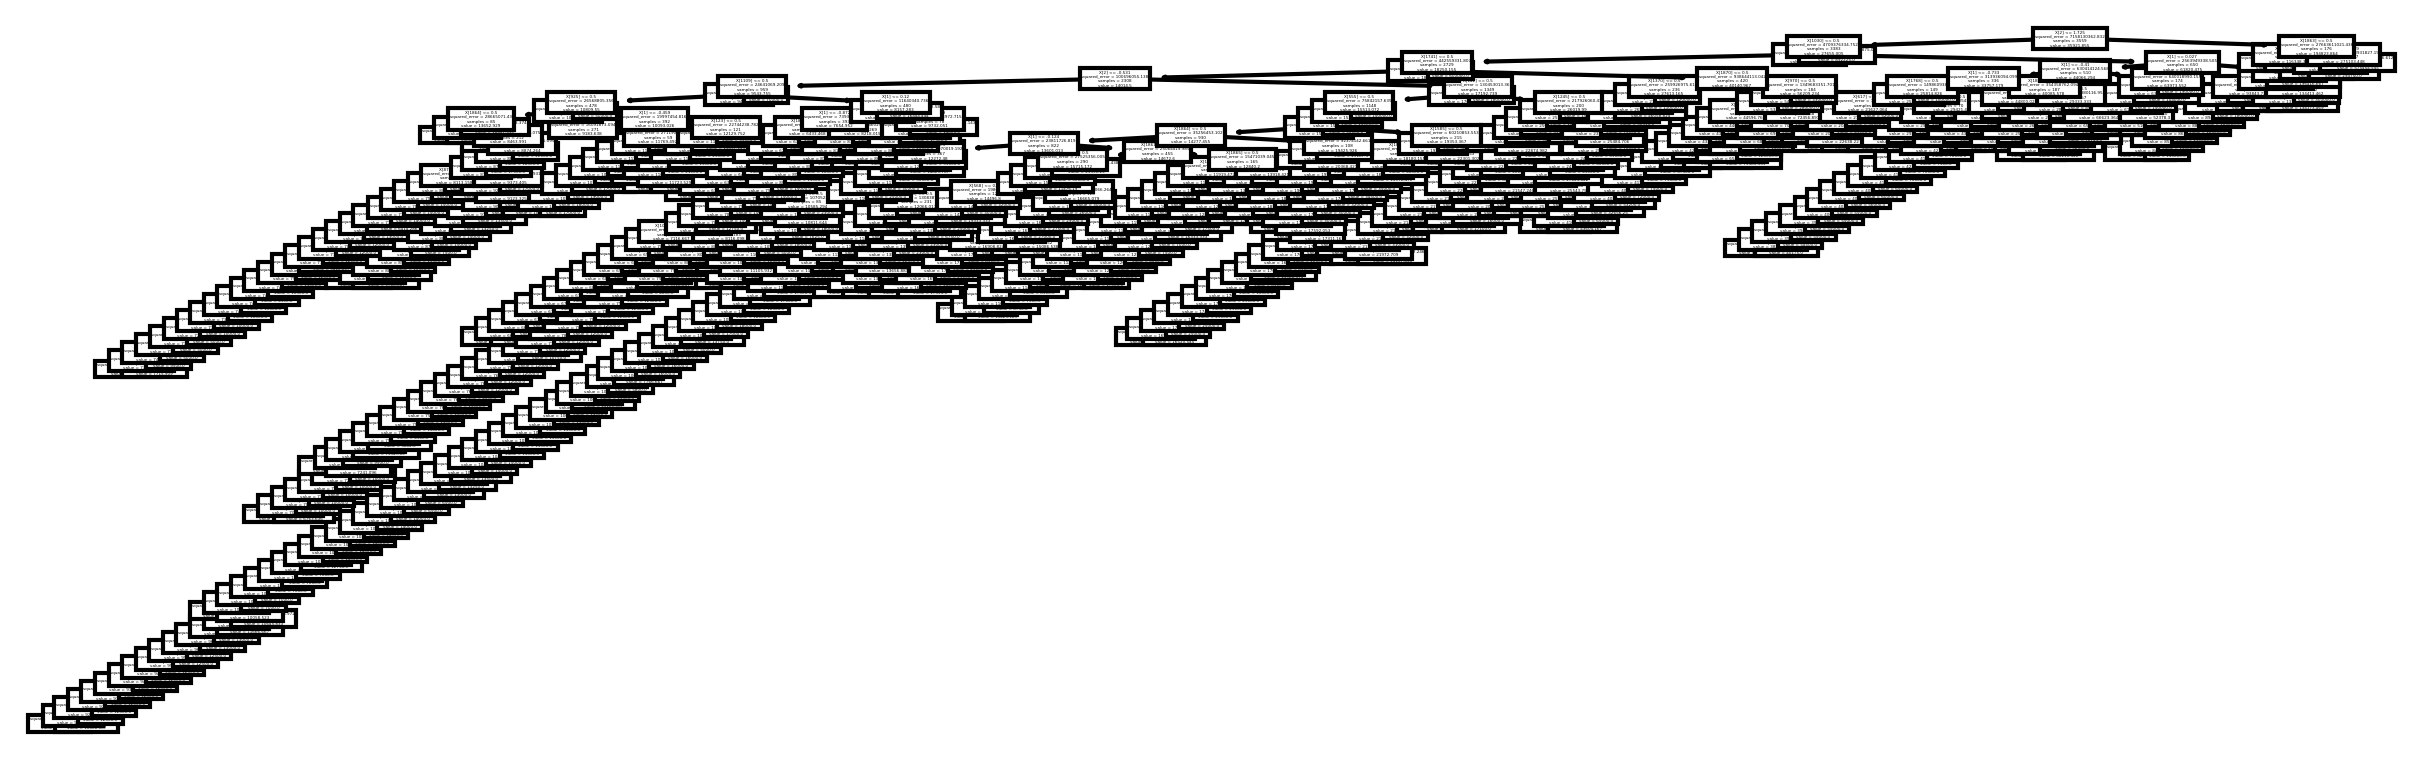

In [100]:
tree = grid3.best_estimator_.named_steps.decisiontreeregressor
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree)

In [101]:
param_grid = {'decisiontreeregressor__ccp_alpha': np.linspace(0., 0.03, 4) }
grid4 = GridSearchCV(pipe, param_grid) 
grid4.fit(X_trainval, y_trainval)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         BHK                   True
Size                  True
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom              True
Point of Contact     False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         BHK                  False
Size                 False
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__ccp_alpha': array([0.  , 0.01, 0.02, 0.03])})

In [102]:
grid4.best_params_

{'decisiontreeregressor__ccp_alpha': 0.02}

In [103]:
grid4.best_score_

0.5354768025711761

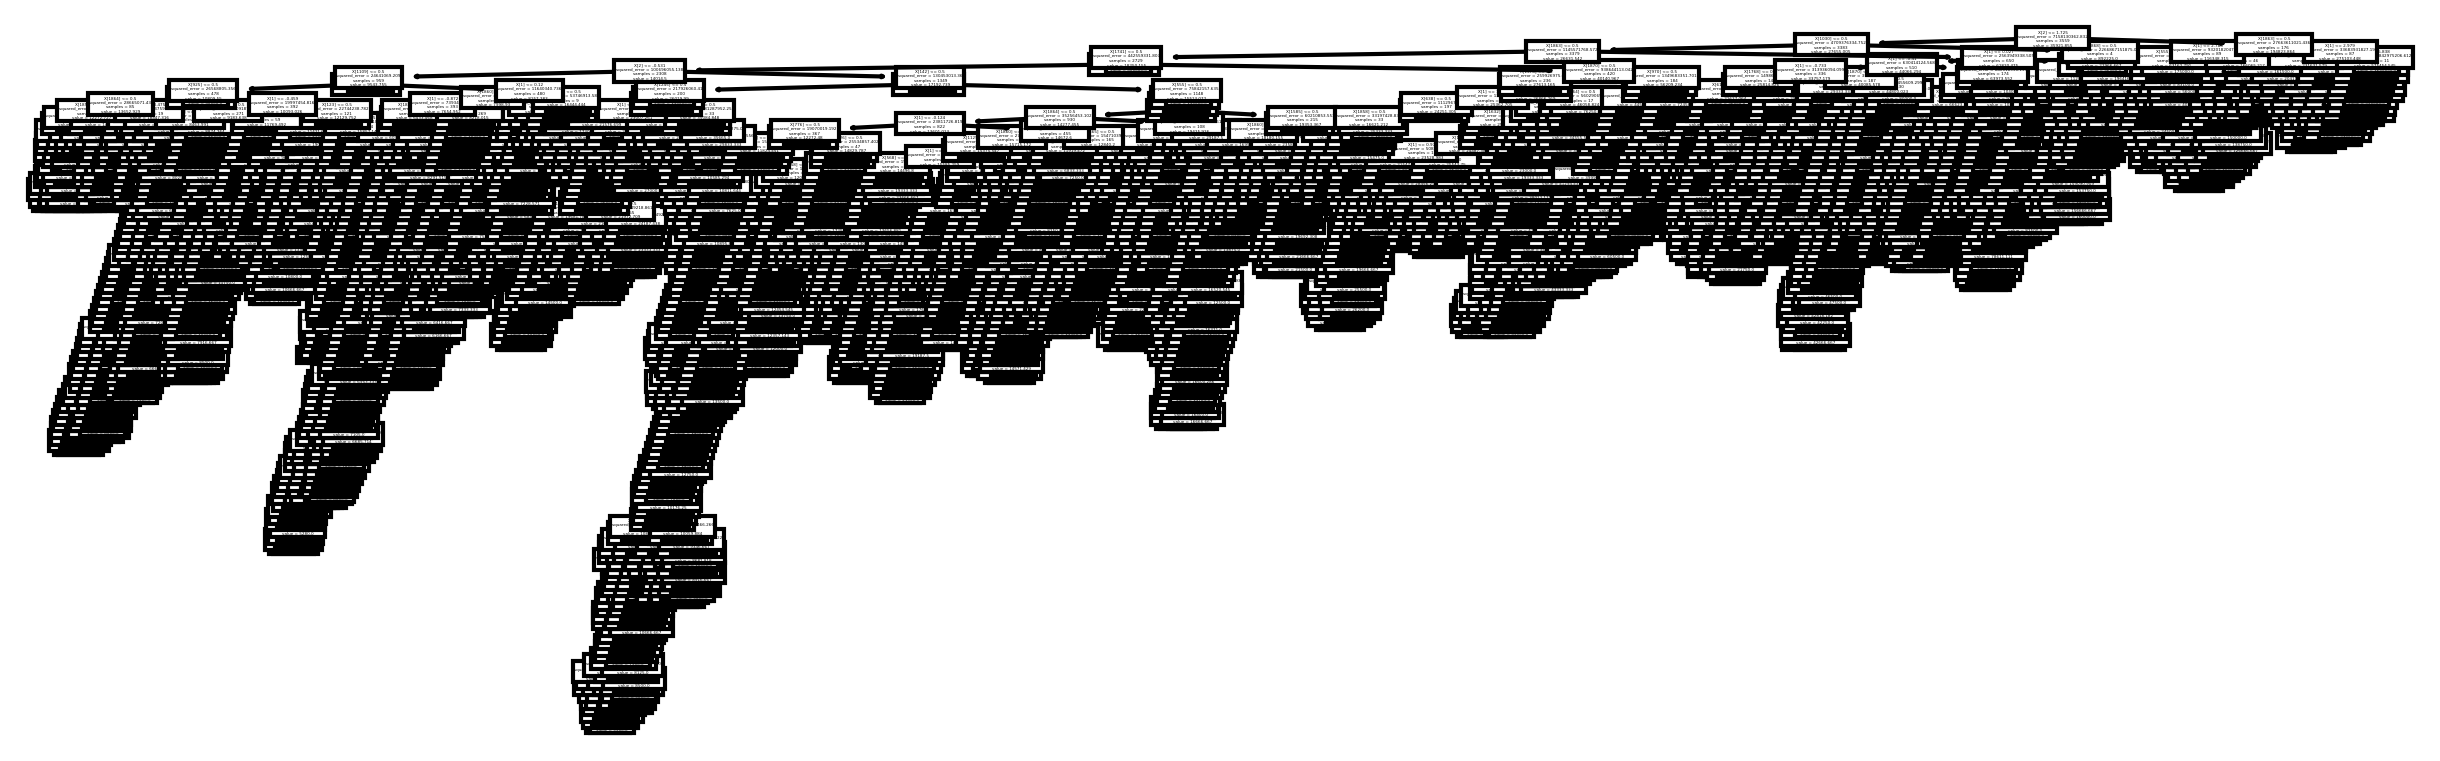

In [104]:
tree = grid4.best_estimator_.named_steps.decisiontreeregressor
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree)

In [105]:
grid2.score(X_test, y_test)

0.5965203424076324

In [106]:
f_imp = grid2.best_estimator_.named_steps.decisiontreeregressor.feature_importances_

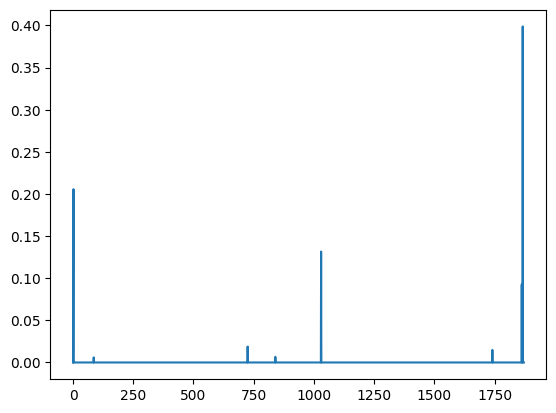

In [107]:
plt.plot(f_imp)

# Preprocessing score in ElasticNet

# Preprocessing score in DecisionTreeRegressor

# Tune the parameters of the models using GridSearchCV for each of the pre-pruning parameters (max_depth, max_leaf_nodes, min_samples_split).

# Tune the parameters of the models using GridSearchCV for the post-pruning parameter